In [1]:
#************************************************************************************************
#************************************************************************************************
#Chukka Chanakya Devendra
#Title: Life Expectancy Prediction Using Machine Learning
#************************************************************************************************
#************************************************************************************************

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import io

# uploaded = files.upload()
# df = pd.read_csv(io.BytesIO(uploaded['Life_Expectancy_Data_1.csv']))


import os
print(os.listdir("../input"))


['lifeexpectancydatacsv']


In [3]:
df = pd.read_csv("../input/lifeexpectancydatacsv/Life Expectancy Data.csv",float_precision='round_trip')


# Basic descriptive statistics

In [4]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler() #normalization

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [7]:

df = round(df)
print('Orginal Dataset:')
print('')
df

Orginal Dataset:



,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,Afghanistan,2014,Developing,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,Afghanistan,2013,Developing,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,Afghanistan,2012,Developing,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,Afghanistan,2011,Developing,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,Zimbabwe,2003,Developing,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,Zimbabwe,2002,Developing,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,Zimbabwe,2001,Developing,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


Clean Data

In [8]:
#____________________________________________PREPROCESS(Clean) DATA____________________________________________

#REMOVE all NaN
df.dropna(subset = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"], inplace=True)

In [9]:
#Change Stats from Developing/Developed to 0/1
a = 0
tempStatus = []
for i in df.Status:
    if i == "Developing":
        tempStatus.append(0) 
        a = a+1
    elif i == "Developed":
        tempStatus.append(1)
        a = a+1

df.Status = tempStatus

In [10]:
#TURN Country into number 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [11]:
#To see our dataset after formating
print('Dataset after clearning:')
print('')
df


Dataset after clearning:



,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,2015,0,65.0,263.0,62,0.0,71.0,65.0,1154,...,6.0,8.0,65.0,0.0,584.0,33736494.0,17.0,17.0,0.0,10.0
1,0,2014,0,60.0,271.0,64,0.0,74.0,62.0,492,...,58.0,8.0,62.0,0.0,613.0,327582.0,18.0,18.0,0.0,10.0
2,0,2013,0,60.0,268.0,66,0.0,73.0,64.0,430,...,62.0,8.0,64.0,0.0,632.0,31731688.0,18.0,18.0,0.0,10.0
3,0,2012,0,60.0,272.0,69,0.0,78.0,67.0,2787,...,67.0,9.0,67.0,0.0,670.0,3696958.0,18.0,18.0,0.0,10.0
4,0,2011,0,59.0,275.0,71,0.0,7.0,68.0,3013,...,68.0,8.0,68.0,0.0,64.0,2978599.0,18.0,18.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,0,44.0,723.0,27,4.0,0.0,68.0,31,...,67.0,7.0,65.0,34.0,454.0,12777511.0,9.0,9.0,0.0,9.0
2934,132,2003,0,44.0,715.0,26,4.0,0.0,7.0,998,...,7.0,7.0,68.0,37.0,453.0,12633897.0,10.0,10.0,0.0,10.0
2935,132,2002,0,45.0,73.0,25,4.0,0.0,73.0,304,...,73.0,7.0,71.0,40.0,57.0,125525.0,1.0,1.0,0.0,10.0
2936,132,2001,0,45.0,686.0,25,2.0,0.0,76.0,529,...,76.0,6.0,75.0,42.0,549.0,12366165.0,2.0,2.0,0.0,10.0


# Heat Map

In [12]:
corr = pd.DataFrame(df.drop('Life_expect', axis=1)).corr() #axis 1 = columns
corr.style.background_gradient(cmap='coolwarm')

,Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
Country,1.000000,-0.018344,-0.079464,0.096978,-0.026246,-0.108226,-0.122092,0.013179,-0.035006,-0.022682,-0.020630,0.011280,-0.022621,-0.036725,0.148609,-0.118019,-0.018489,-0.026689,0.004386,-0.016205,-0.050765
Year,-0.018344,1.000000,-0.034138,-0.037092,0.008029,-0.112899,0.069562,0.114897,-0.053822,0.005589,0.010479,-0.016699,0.061894,0.029641,-0.123475,0.096421,0.012567,0.023287,0.012403,0.021958,0.083280
Status,-0.079464,-0.034138,1.000000,-0.278173,-0.108757,0.603650,0.461684,0.140351,-0.071963,0.298155,-0.109847,0.201917,0.184183,0.201654,-0.129347,0.484801,-0.034790,-0.303958,-0.307720,0.228885,0.510937
Adult_Mortality,0.096978,-0.037092,-0.278173,1.000000,0.042450,-0.172450,-0.237605,-0.105225,-0.003967,-0.351086,0.060365,-0.199853,-0.080473,-0.191429,0.552159,-0.255034,-0.015012,0.272172,0.284619,-0.425121,-0.417721
infant_deaths,-0.026246,0.008029,-0.108757,0.042450,1.000000,-0.106805,-0.090760,-0.231769,0.532680,-0.234428,0.996906,-0.156929,-0.148666,-0.161871,0.006401,-0.098093,0.671758,0.463200,0.462339,-0.056825,-0.211643
Alcohol,-0.108226,-0.112899,0.603650,-0.172450,-0.106805,1.000000,0.414026,0.112269,-0.049617,0.353508,-0.101441,0.240872,0.212133,0.244308,-0.024821,0.441285,-0.030891,-0.401871,-0.387176,0.350776,0.610711
percentage_expenditure,-0.122092,0.069562,0.461684,-0.237605,-0.090760,0.414026,1.000000,0.016759,-0.063069,0.242560,-0.092153,0.128624,0.179368,0.134810,-0.095237,0.959300,-0.016786,-0.251035,-0.252789,0.199307,0.423599
HepatitisB,0.013179,0.114897,0.140351,-0.105225,-0.231769,0.112269,0.016759,1.000000,-0.124800,0.143377,-0.240766,0.463331,0.110089,0.588990,-0.095331,0.041850,-0.129723,-0.128217,-0.133512,0.223944,0.212167
Measles,-0.035006,-0.053822,-0.071963,-0.003967,0.532680,-0.049617,-0.063069,-0.124800,1.000000,-0.153435,0.517506,-0.057850,-0.106421,-0.058606,-0.003564,-0.064768,0.321946,0.180785,0.174918,-0.010798,-0.112327
BMI,-0.022682,0.005589,0.298155,-0.351086,-0.234428,0.353508,0.242560,0.143377,-0.153435,1.000000,-0.242127,0.186606,0.183288,0.176463,-0.212926,0.265945,-0.081323,-0.547977,-0.553837,0.461031,0.550287


# Feature relation Graph

In [13]:
X = df[["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]
y = df.Life_expect

X_temp = np.array(X).reshape(-1,22)
y_temp = np.array(y).reshape(-1,1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2)

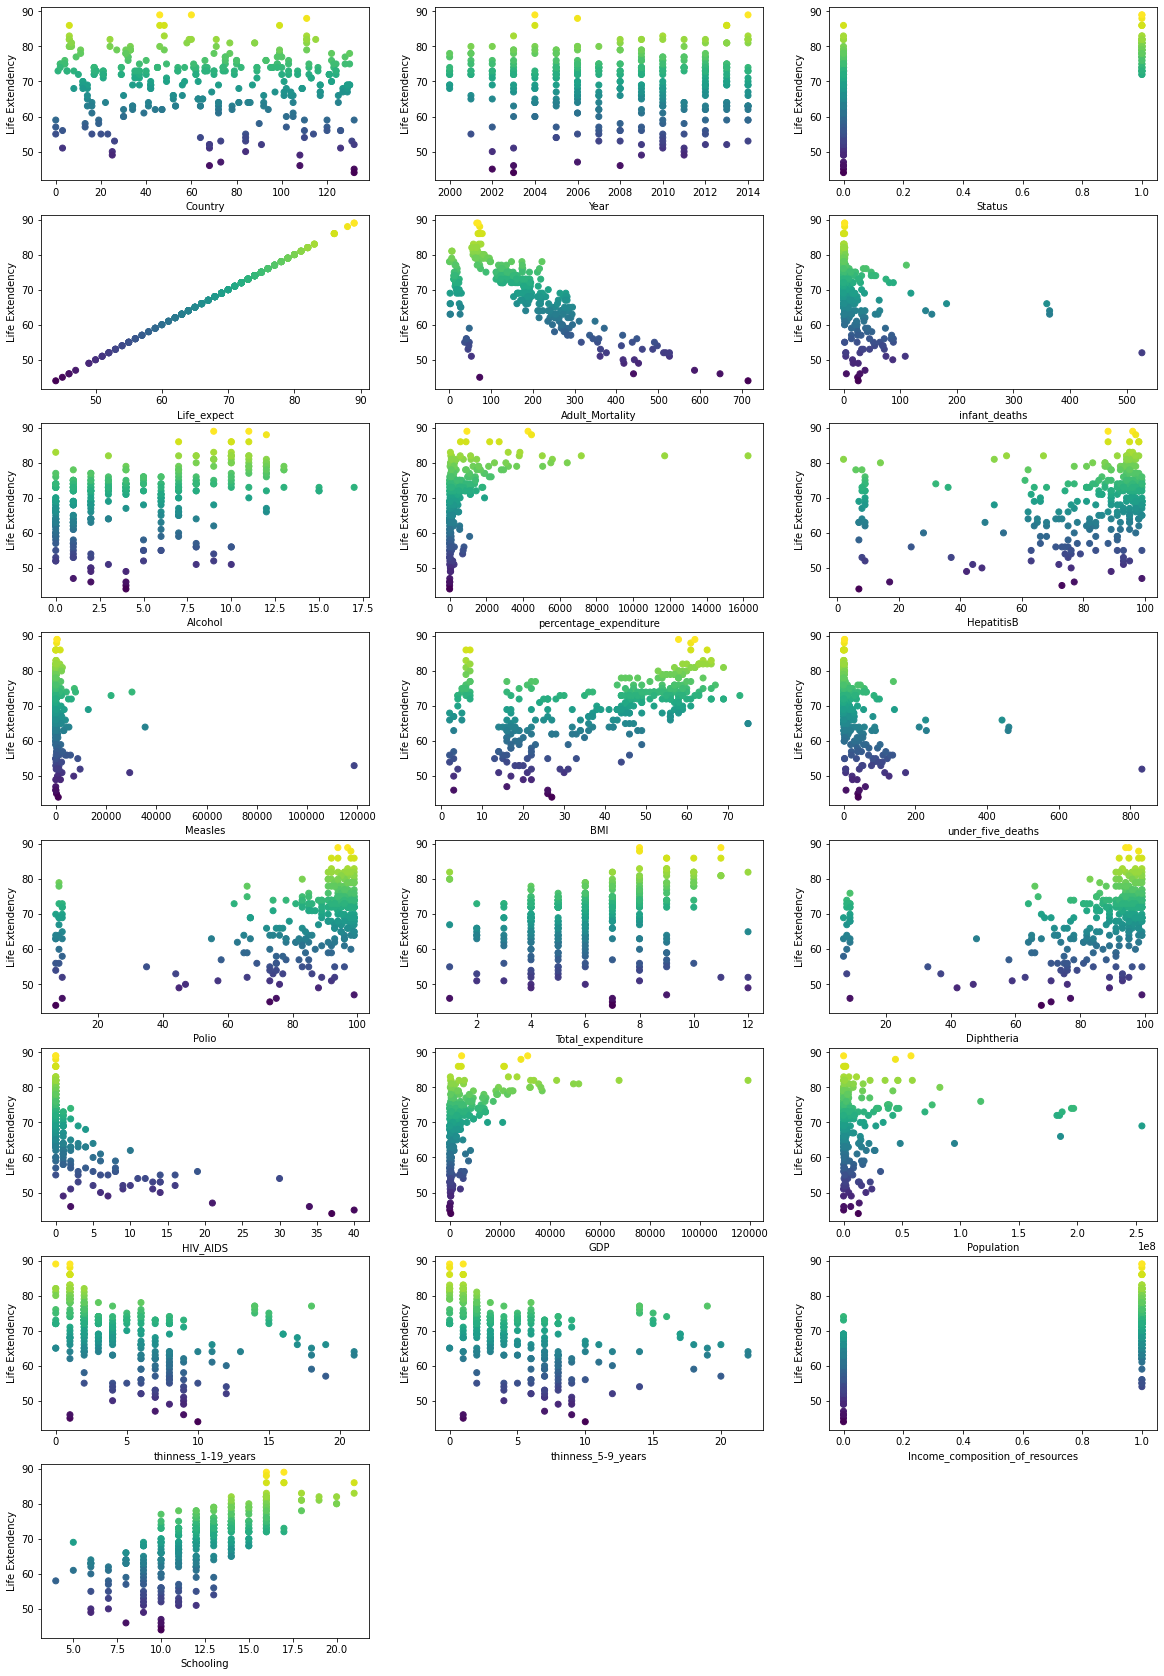

In [15]:
plt_name = ["Country","Year","Status","Life_expect","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]
plt.figure(figsize=(20,30))
for i in range(0,22):
  plt.subplot(8,3,i+1)
  # plt.title(plt_name[i]+'vs Life Extendency')
  plt.xlabel(plt_name[i])
  plt.ylabel('Life Extendency')
  plt.scatter(X_test[:,i],y_test,c=y_test,label='data')
  # plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()

# Feature Relevant Score

Feature importance score:

[0.03694366 0.05250863 0.0082493  0.23996173 0.06318006 0.03623978
 0.03844501 0.04009069 0.034039   0.03041231 0.04444292 0.03894933
 0.03324658 0.03786912 0.03365611 0.02460384 0.04099868 0.03388453
 0.03644756 0.03761844 0.01247115 0.04574159]


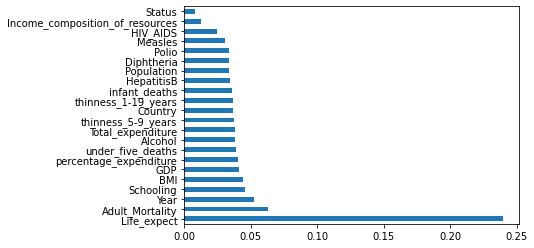

In [16]:
#____________________________________________SEE WHICH FEATURE IS MORE RELEVANT____________________________________________

print('Feature importance score:')
print('')

X = df.iloc[:,0:22]         #columns
y = df.iloc[:,3]            #target column

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.show()

# Fitness Score

In [17]:
#____________________________________________SEE WHICH FEATURE HAVE BEST FITNESS____________________________________________
print('Feature fitness score:')
print('')

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.iloc[:,0:22]            #columns
y = df.iloc[:,3]               #target column

bestfeatures = SelectKBest(score_func=chi2, k=22)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#connect both data
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(22,'Score'))


Feature fitness score:

                            Feature         Score
17                       Population  2.158103e+10
16                              GDP  1.776961e+07
9                           Measles  3.496988e+06
7            percentage_expenditure  3.182847e+06
11                under_five_deaths  8.446130e+04
4                   Adult_Mortality  8.224754e+04
5                     infant_deaths  5.775827e+04
15                         HIV_AIDS  2.268890e+04
10                              BMI  5.747871e+03
0                           Country  2.370820e+03
19               thinness_5-9_years  1.939629e+03
6                           Alcohol  1.884580e+03
18              thinness_1-19_years  1.867492e+03
3                       Life_expect  1.842903e+03
12                            Polio  1.462188e+03
14                       Diphtheria  1.375944e+03
8                        HepatitisB  1.137094e+03
21                        Schooling  6.593116e+02
2                         

Prepared data

In [18]:
hf_X = df[['Status','Adult_Mortality','infant_deaths','percentage_expenditure','Measles','BMI','under_five_deaths','Total_expenditure','HIV_AIDS','GDP','Income_composition_of_resources','Schooling']]
lf_X = df[["Country","Year","Status","Adult_Mortality"
                       ,"infant_deaths","Alcohol","percentage_expenditure","HepatitisB","Measles"
                       ,"BMI","under_five_deaths","Polio","Total_expenditure","Diphtheria"
                       ,"HIV_AIDS","GDP","Population","thinness_1-19_years","thinness_5-9_years"
                       ,"Income_composition_of_resources","Schooling"]]

yd = df.Life_expect


hf_X = np.array(hf_X).reshape(-1,12)
lf_X = np.array(lf_X).reshape(-1,21)
yd = np.array(yd).reshape(-1,1)



# Principal Component Analysis (PCA)
Dimensionality Reduction

In [19]:
from sklearn.decomposition import PCA

In [20]:
X = hf_X
y = yd


In [21]:
X = StandardScaler().fit_transform(X)

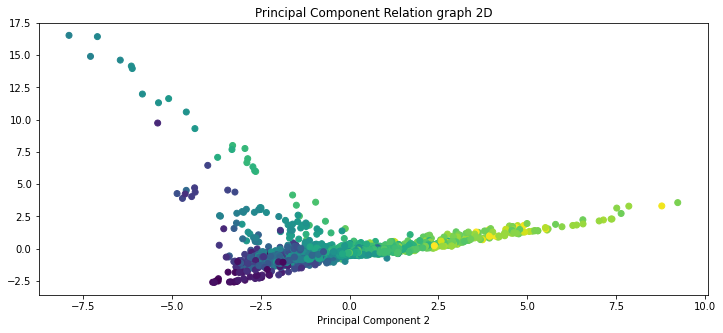

In [22]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
plt.title('Principal Component Relation graph 2D')
plt.xlabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.scatter(X_PCA[:,0],X_PCA[:,1],c = y,label='data')
# plt.scatter(X_test[:,i],y_pred,color='black',label = 'pred')
plt.show()

In [23]:
print(pca.explained_variance_ratio_)
print(pca.components_)
print(pca.mean_)

[0.31907947 0.18914477]
[[ 0.32211015 -0.29022951 -0.22290339  0.34610743 -0.14923631  0.33465263
  -0.22847856  0.16175369 -0.1811508   0.36060224  0.30603742  0.4164091 ]
 [ 0.11783452 -0.19915442  0.56570613  0.1618389   0.43898908  0.00139086
   0.55776714 -0.07515427 -0.16798706  0.16599707  0.16165038  0.09415976]]
[-3.01625176e-17 -7.75607595e-17 -4.30893108e-18 -8.61786217e-18
 -4.30893108e-18  1.72357243e-17 -2.58535865e-17 -6.46339663e-17
  4.30893108e-17  8.61786217e-18 -8.61786217e-17  1.55121519e-16]


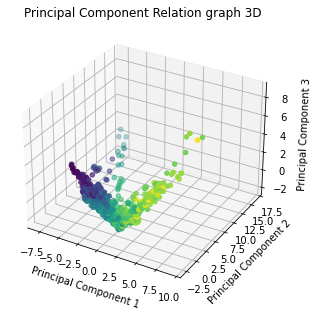

In [24]:
pca = PCA(n_components=3)
pca.fit(X)
X_PCA = pca.transform(X)

plt.figure(figsize=(12,5))
ax = plt.axes(projection='3d')
plt.title('Principal Component Relation graph 3D')
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y)

# Linear Regression

high fitness

In [25]:
X = hf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#****Set Train****
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [28]:
print('This is regration accuracy score:')
r2_score(y_pred, y_test)

This is regration accuracy score:


0.7667006948432299

In [29]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [30]:
scores

array([0.79688098, 0.72040945, 0.78475367, 0.77351861, 0.85454246])

In [31]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.79 r2 accuracy with a standard deviation of 0.04


In [32]:
#____________________________________________Display Data in Lineat Regression____________________________________________
pca = PCA(n_components=1)
pca.fit(X)
X_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

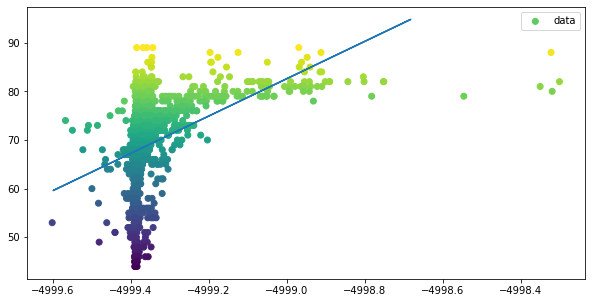

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(X_PCA,y_train,c=y_train,label='data')

X_test_PCA = np.array(X_test_PCA).reshape(-1)
m, b = np.polyfit(X_test_PCA, y_pred, 1)
plt.plot(X_test_PCA, m*X_test_PCA + b)
# plt.plot(X_test_PCA,y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

In [34]:
#____________________________________________Linear Regration Predict 01____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 65

Prediction of life expectancy:
[[64.49514424]]


In [35]:
#____________________________________________Linear Regration Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[[62.88453791]]


In [36]:
#____________________________________________Linear Regration Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[[60.05126725]]


Low fitness

In [37]:
X = lf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [38]:
#Normalization
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#****Set Train****
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [40]:
#____________________________________________SEE THE ACCURACY SCORE____________________________________________
print('This is regration accuracy score:')
r2_score(y_pred, y_test)

This is regration accuracy score:


0.7849463100626917

In [41]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [42]:
scores

array([0.77081908, 0.73994502, 0.78346844, 0.84092541, 0.7651394 ])

In [43]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.78 r2 accuracy with a standard deviation of 0.03


In [44]:

pca = PCA(n_components=1)
pca.fit(X)
X_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

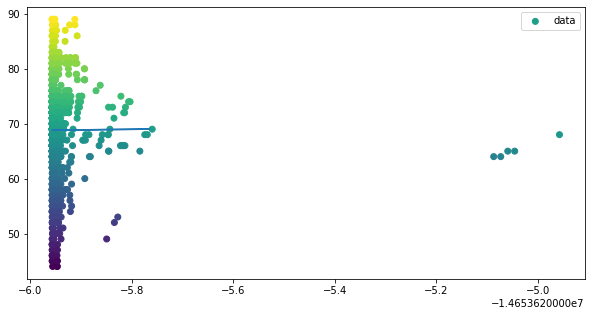

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(X_PCA,y_train,c=y_train,label='data')

X_test_PCA = np.array(X_test_PCA).reshape(-1)
m, b = np.polyfit(X_test_PCA, y_pred, 1)
plt.plot(X_test_PCA, m*X_test_PCA + b)
# plt.plot(X_test_PCA,y_pred,color='black',label = 'pred')
plt.legend()
plt.show()

In [46]:
print('Prediction of life expectancy:')
temp_data = [[0,2015,0,263,62,0.01,71.27962362,65,1154,19.1,83,6,8.16,65,0.1,584.25921,33736494,17.2,17.3,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
# the correct life expectancy is 65

Prediction of life expectancy:
[[63.24171156]]


In [47]:
#____________________________________________Linear Regration Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,2009,0,281,77,0.01,56.76221682,63,2861,16.2,106,63,9.42,63,0.1,445.8932979,284331,18.6,18.7,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[[62.09791116]]


In [48]:
#____________________________________________Linear Regration Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,2003,0,295,87,0.01,11.08905273,65,798,13.4,122,41,8.82,41,0.1,198.7285436,2364851,19.7,19.9,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[[58.98071447]]


# SVR

In [49]:
from sklearn.svm import SVR #SVR for Regression, SVC for Classicif

In [50]:
X = hf_X
y = df.Life_expect

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# temp_X_train= X_train


In [51]:
#Normalization
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
reg = SVR()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [53]:
r2_score(y_test, y_pred)

0.8454356822445148

In [54]:
scores = cross_val_score(reg, X_test, y_test, cv=5,scoring= 'r2')

In [55]:
scores

array([0.73570637, 0.72296185, 0.71729491, 0.66394364, 0.75554708])

In [56]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.72 r2 accuracy with a standard deviation of 0.03


In [57]:
#____________________________________________SVR Predict 01____________________________________________

print('Prediction of life expectancy:')
temp_data = [[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 65

Prediction of life expectancy:
[62.44572793]


In [58]:
#____________________________________________SVR Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[60.94084981]


In [59]:
#____________________________________________SVR Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[58.83703843]


# Neural Network


In [60]:
import sklearn.neural_network as nn

In [61]:
X = hf_X
y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [62]:
#Normalization
temp_X_train = X_train
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [63]:
reg = nn.MLPRegressor(hidden_layer_sizes=(1000,1000,5), activation='relu', alpha=0.01, random_state= 20,max_iter=200)

reg.fit(X_train, y_train.ravel())
y_pred = reg.predict(X_test)

yu = y_pred.reshape(-1,1)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [64]:
r2_score(y_test, yu)

0.9068764426310356

In [65]:
scores = cross_val_score(reg, X_test, y_test.ravel(), cv=5,scoring= 'r2')
# maximum iteration reach the potimization, can not run sometimes

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multi

In [66]:
scores

array([0.78334461, 0.87948915, 0.8032843 , 0.81259733, 0.82641839])

In [67]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.82 r2 accuracy with a standard deviation of 0.03


In [68]:
#____________________________________________neural_network Predict 01____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)

#the correct life expectancy is 65

Prediction of life expectancy:
[61.60910762]


In [69]:
#____________________________________________neural_network Predict 02____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]]
scaler.fit(temp_X_train)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 58.6

Prediction of life expectancy:
[59.91221482]


In [70]:
#____________________________________________neural_network Predict 03____________________________________________
print('Prediction of life expectancy:')
temp_data = [[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]]
scaler.fit(temp_X_train)
abc =reg.predict(temp_data)
temp_data = scaler.transform(temp_data)
abc = reg.predict(temp_data)
print(abc)
#the correct life expectancy is 56.7

Prediction of life expectancy:
[57.9354216]


# TREE

Bagged Decision Tree


In [71]:
X = hf_X

y = yd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor(random_state=20)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

yu = y_pred.reshape(-1,1)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [73]:
print(r2_score(y_test,yu))

0.926922427805152


In [74]:
scores = cross_val_score(reg, X_test, y_test.ravel(), cv=10,scoring= 'r2')

In [75]:
scores

array([0.90328958, 0.92364999, 0.84081111, 0.85608099, 0.93448817,
       0.93051572, 0.83714161, 0.8972506 , 0.89439849, 0.77454928])

In [76]:
print("%0.2f r2 accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.88 r2 accuracy with a standard deviation of 0.05


In [77]:
#____________________________________________Bagged Decision Tree Predict 01____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,263,62,71.27962,1154,19.1,83,8.16,0.1,584.2592,0.479,10.1]])


#the correct life expectancy is 65

Prediction of life expectancy:


array([60.4])

In [78]:
#____________________________________________Bagged Decision Tree Predict 02____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,281,77,56.76221682,2861,16.2,106,9.42,0.1,445.8932979,0.434,8.9]])


#the correct life expectancy is 58.6

Prediction of life expectancy:


array([58.9])

In [79]:
#____________________________________________Bagged Decision Tree Predict 03____________________________________________
print('Prediction of life expectancy:')
reg.predict([[0,295,87,11.08905273,798,13.4,122,8.82,0.1,198.7285436,0.373,6.5]])

#the correct life expectancy is 56.7

Prediction of life expectancy:


array([56.4])